<a href="https://colab.research.google.com/github/mb8655/Python/blob/main/Pandas_Reading_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#intro to pandas

## setup and preliminaries

In [1]:
!sudo pip install -U -q PyMySQL sqlalchemy sql_magic xlrd

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 3.8 MB/s eta 0:00:00


##Loading data from MySQL Server using the read_sql command
DOH Restaurant Inspections

In [2]:
import os
from sqlalchemy import create_engine
from sqlalchemy import text

conn_string = 'mysql+pymysql://{user}:{password}@{host}/{db}?charset=utf8mb4'.format(
    host = 'db.ipeirotis.org',
    user = 'student',
    password = 'dwdstudent2025',
    db = 'doh_restaurants',
    encoding = 'utf8mb4')

engine = create_engine(conn_string)

In [4]:
# This query returns back the restaurants in the DOH database
sql = '''
	SELECT R.CAMIS, R.DBA, R.BUILDING, R.STREET, R.ZIPCODE, R.BORO,
          R.CUISINE_DESCRIPTION, R.LATITUDE, R.LONGITUDE
		FROM doh_restaurants.restaurants R

'''

with engine.connect() as connection:
	restaurants = pd.read_sql(text(sql), con=connection)

In [5]:
# view the created df
restaurants.head(10)

,CAMIS,DBA,BUILDING,STREET,ZIPCODE,BORO,CUISINE_DESCRIPTION,LATITUDE,LONGITUDE
0,30075445,MORRIS PARK BAKE SHOP,1007,MORRIS PARK AVENUE,10462,Bronx,Bakery Products/Desserts,40.8482,-73.8560
1,30112340,WENDY'S,469,FLATBUSH AVENUE,11225,Brooklyn,Hamburgers,40.6627,-73.9621
2,30191841,DJ REYNOLDS PUB AND RESTAURANT,351,WEST 57 STREET,10019,Manhattan,Irish,40.7673,-73.9843
3,40356018,RIVIERA CATERERS,2780,STILLWELL AVENUE,11224,Brooklyn,American,40.5799,-73.9821
4,40356483,WILKEN'S FINE FOOD,7114,AVENUE U,11234,Brooklyn,Sandwiches,40.6201,-73.9070
5,40356731,TASTE THE TROPICS ICE CREAM,1839,NOSTRAND AVENUE,11226,Brooklyn,Frozen Desserts,40.6408,-73.9485
6,40357217,WILD ASIA,2300,SOUTHERN BOULEVARD,10460,Bronx,American,40.8505,-73.8825
7,40359480,1 EAST 66TH STREET KITCHEN,1,EAST 66 STREET,10065,Manhattan,American,40.7685,-73.9696
8,40359705,NATHAN'S FAMOUS,1310,SURF AVENUE,11224,Brooklyn,Hotdogs,40.5755,-73.9817
9,40360045,SEUDA FOODS,705,KINGS HIGHWAY,11223,Brooklyn,Jewish/Kosher,40.6062,-73.9655


Loading a CSV file using the read_csv command
2018 Central Park Squirrel Census
Let's get the 2018 Central Park Squirrel Census https://data.cityofnewyork.us/Environment/2018-Central-Park-Squirrel-Census-Squirrel-Data/vfnx-vebw

In [7]:
# Option 1: Download the CSV dataset using
# the "!curl" command (a Linux command line)
# To get the URL, go to "Export => CSV" and then copy the link
!curl https://data.cityofnewyork.us/api/views/vfnx-vebw/rows.csv?accessType=DOWNLOAD -o squirrel_census.csv
squirrels = pd.read_csv("squirrel_census.csv")

squirrels

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  730k    0  730k    0     0  1222k      0 --:--:-- --:--:-- --:--:-- 1221k


,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3018,-73.963943,40.790868,30B-AM-1007-04,30B,AM,10072018,4,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9639431360458 40.7908677445466)
3019,-73.970402,40.782560,19A-PM-1013-05,19A,PM,10132018,5,Adult,Gray,White,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9704015859639 40.7825600069973)
3020,-73.966587,40.783678,22D-PM-1012-07,22D,PM,10122018,7,Adult,Gray,"Black, Cinnamon, White",...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9665871993517 40.7836775064883)
3021,-73.963994,40.789915,29B-PM-1010-02,29B,PM,10102018,2,NaN,Gray,"Cinnamon, White",...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9639941227864 40.7899152327912)


In [8]:
# Option 2: Read the URL directly
# Fine for small datasets, not great when you have a big dataset and
# may want to reload it repeatedly
url = 'https://data.cityofnewyork.us/api/views/vfnx-vebw/rows.csv?accessType=DOWNLOAD'
squirrels = pd.read_csv(url)

In [9]:
#view the df
squirrels

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3018,-73.963943,40.790868,30B-AM-1007-04,30B,AM,10072018,4,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9639431360458 40.7908677445466)
3019,-73.970402,40.782560,19A-PM-1013-05,19A,PM,10132018,5,Adult,Gray,White,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9704015859639 40.7825600069973)
3020,-73.966587,40.783678,22D-PM-1012-07,22D,PM,10122018,7,Adult,Gray,"Black, Cinnamon, White",...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9665871993517 40.7836775064883)
3021,-73.963994,40.789915,29B-PM-1010-02,29B,PM,10102018,2,NaN,Gray,"Cinnamon, White",...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9639941227864 40.7899152327912)


#Data maniputation techniques
Below, we apply a variety of data maniputation techniques to improve the dataset.

In [11]:
# The command below adds underscores in all column names and capitalizes them
cols = squirrels.columns.map(lambda x: x.replace(' ', '_').upper())
squirrels.columns = cols

squirrels.head(5)

,X,Y,UNIQUE_SQUIRREL_ID,HECTARE,SHIFT,DATE,HECTARE_SQUIRREL_NUMBER,AGE,PRIMARY_FUR_COLOR,HIGHLIGHT_FUR_COLOR,...,KUKS,QUAAS,MOANS,TAIL_FLAGS,TAIL_TWITCHES,APPROACHES,INDIFFERENT,RUNS_FROM,OTHER_INTERACTIONS,LAT/LONG
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)


In [12]:
# format the date column
# See https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes
# for the meaning of the "format" variable
squirrels['DATE'] = pd.to_datetime(squirrels['DATE'], format='%m%d%Y')

squirrels.head(10)

,X,Y,UNIQUE_SQUIRREL_ID,HECTARE,SHIFT,DATE,HECTARE_SQUIRREL_NUMBER,AGE,PRIMARY_FUR_COLOR,HIGHLIGHT_FUR_COLOR,...,KUKS,QUAAS,MOANS,TAIL_FLAGS,TAIL_TWITCHES,APPROACHES,INDIFFERENT,RUNS_FROM,OTHER_INTERACTIONS,LAT/LONG
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,2018-10-14,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,2018-10-19,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,2018-10-14,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,2018-10-17,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,2018-10-17,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)
5,-73.968361,40.772591,11H-AM-1010-03,11H,AM,2018-10-10,3,Adult,Cinnamon,White,...,False,False,False,False,True,False,True,False,NaN,POINT (-73.9683613516225 40.7725908847499)
6,-73.954120,40.793181,36H-AM-1010-02,36H,AM,2018-10-10,2,Adult,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9541201789795 40.7931811701082)
7,-73.958269,40.791737,33F-AM-1008-02,33F,AM,2018-10-08,2,Adult,Gray,NaN,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9582694312289 40.7917367820255)
8,-73.967429,40.782972,21C-PM-1006-01,21C,PM,2018-10-06,1,Adult,Gray,NaN,...,False,False,False,True,True,False,False,False,NaN,POINT (-73.9674285955293 40.7829723919744)
9,-73.972250,40.774288,11D-AM-1010-03,11D,AM,2018-10-10,3,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9722500196844 40.7742879599026)


In [13]:
# Delete the column "LAT/LONG"
squirrels = squirrels.drop(["LAT/LONG"], axis = "columns")

squirrels

,X,Y,UNIQUE_SQUIRREL_ID,HECTARE,SHIFT,DATE,HECTARE_SQUIRREL_NUMBER,AGE,PRIMARY_FUR_COLOR,HIGHLIGHT_FUR_COLOR,...,OTHER_ACTIVITIES,KUKS,QUAAS,MOANS,TAIL_FLAGS,TAIL_TWITCHES,APPROACHES,INDIFFERENT,RUNS_FROM,OTHER_INTERACTIONS
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,2018-10-14,3,NaN,NaN,NaN,...,NaN,False,False,False,False,False,False,False,False,NaN
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,2018-10-19,4,NaN,NaN,NaN,...,NaN,False,False,False,False,False,False,False,False,NaN
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,2018-10-14,8,NaN,Gray,NaN,...,NaN,False,False,False,False,False,False,False,False,NaN
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,2018-10-17,14,Adult,Gray,NaN,...,NaN,False,False,False,False,False,False,False,True,NaN
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,2018-10-17,5,Adult,Gray,Cinnamon,...,NaN,False,False,False,False,False,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3018,-73.963943,40.790868,30B-AM-1007-04,30B,AM,2018-10-07,4,Adult,Gray,NaN,...,NaN,False,False,False,False,False,False,False,True,NaN
3019,-73.970402,40.782560,19A-PM-1013-05,19A,PM,2018-10-13,5,Adult,Gray,White,...,NaN,False,False,False,False,False,False,True,False,NaN
3020,-73.966587,40.783678,22D-PM-1012-07,22D,PM,2018-10-12,7,Adult,Gray,"Black, Cinnamon, White",...,NaN,False,False,False,False,False,False,True,False,NaN
3021,-73.963994,40.789915,29B-PM-1010-02,29B,PM,2018-10-10,2,NaN,Gray,"Cinnamon, White",...,NaN,False,False,False,False,False,False,True,False,NaN


#Loading an Excel file using the read_excel command
Titanic Dataset
Let's now load the Titanic dataset from an Excel file.https://www.openml.org/search?type=data&sort=runs&id=40945&status=active

In [14]:
#pull excel file from

titanic_url = 'https://storage.googleapis.com/datasets_nyu/titanic.xls'
titanic = pd.read_excel(titanic_url)
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


#Data Dictionary for DOH Restaurants dataset
The DOHMH New York City Restaurant Inspection Results contains a pointer to an Excel file called the "data dictionary". Let's download it and see how it looks like.


https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j

In [23]:
# pull data dictionary for DOH
url = 'https://data.cityofnewyork.us/api/views/43nn-pn8j/files/ec33d2c8-81f5-499a-a238-0213a38239cd?download=true&filename=RestaurantInspectionDataDictionary_09242018.xlsx'
restaurants_data_dictionary = pd.read_excel (url, sheet_name=1, header=1);
restaurants_data_dictionary


,Column Name,Column Description,"Term, Acronym, or Code Definitions","Additional Notes \n(where applicable, include the range of possible values, units of measure, how to interpret null/zero values, whether there are specific relationships between columns, and information on column source)"
0,NaN,NaN,NaN,NaN
1,CAMIS,Unique identifier for the establishment (resta...,NaN,"10-digit integer, static per restaurant permit"
2,DBA,Establishment (restaurant) name,DBA= Doing Business As,"Public business name, may change at discretion..."
3,BORO,Borough of establishment (restaurant) location,• 1 = MANHATTAN\n• 2 = BRONX\n• 3 = BROOKLYN\n...,NOTE: There may be discrepancies between zip c...
4,BUILDING,Building number for establishment (restaurant)...,NaN,NaN
5,STREET,Street name for establishment (restaurant) loc...,NaN,NaN
6,ZIPCODE,Zip code of establishment (restaurant) location,NaN,NaN
7,PHONE,Phone number,NaN,Phone number provided by restaurant owner/manager
8,CUISINE DESCRIPTION,Establishment (restaurant) cuisine,NaN,Optional field provided by provided by restaur...
9,INSPECTION DATE,NaN,NaN,NOTE: Inspection dates of 1/1/1900 mean an est...


In [24]:
# Rename the columns to reflect data
restaurants_data_dictionary.columns = ['Column_Name', 'Description', 'Code_Definitions', 'Notes']


restaurants_data_dictionary.head(10)

,Column_Name,Description,Code_Definitions,Notes
0,NaN,NaN,NaN,NaN
1,CAMIS,Unique identifier for the establishment (resta...,NaN,"10-digit integer, static per restaurant permit"
2,DBA,Establishment (restaurant) name,DBA= Doing Business As,"Public business name, may change at discretion..."
3,BORO,Borough of establishment (restaurant) location,• 1 = MANHATTAN\n• 2 = BRONX\n• 3 = BROOKLYN\n...,NOTE: There may be discrepancies between zip c...
4,BUILDING,Building number for establishment (restaurant)...,NaN,NaN
5,STREET,Street name for establishment (restaurant) loc...,NaN,NaN
6,ZIPCODE,Zip code of establishment (restaurant) location,NaN,NaN
7,PHONE,Phone number,NaN,Phone number provided by restaurant owner/manager
8,CUISINE DESCRIPTION,Establishment (restaurant) cuisine,NaN,Optional field provided by provided by restaur...
9,INSPECTION DATE,NaN,NaN,NOTE: Inspection dates of 1/1/1900 mean an est...


In [25]:
# Drop the first line as NaN row
restaurants_data_dictionary = restaurants_data_dictionary.drop(0, axis='index')


restaurants_data_dictionary.head(10)

,Column_Name,Description,Code_Definitions,Notes
1,CAMIS,Unique identifier for the establishment (resta...,NaN,"10-digit integer, static per restaurant permit"
2,DBA,Establishment (restaurant) name,DBA= Doing Business As,"Public business name, may change at discretion..."
3,BORO,Borough of establishment (restaurant) location,• 1 = MANHATTAN\n• 2 = BRONX\n• 3 = BROOKLYN\n...,NOTE: There may be discrepancies between zip c...
4,BUILDING,Building number for establishment (restaurant)...,NaN,NaN
5,STREET,Street name for establishment (restaurant) loc...,NaN,NaN
6,ZIPCODE,Zip code of establishment (restaurant) location,NaN,NaN
7,PHONE,Phone number,NaN,Phone number provided by restaurant owner/manager
8,CUISINE DESCRIPTION,Establishment (restaurant) cuisine,NaN,Optional field provided by provided by restaur...
9,INSPECTION DATE,NaN,NaN,NOTE: Inspection dates of 1/1/1900 mean an est...
10,ACTION,Action associated with each establishment (res...,• Violations were cited in the following area(...,NaN


#Loading a "Fixed Width" file using the read_fwf command
Accidental Deaths in the USA
This dataset is in "fixed width" format and contains the monthly totals of accidental deaths in the USA.https://storage.googleapis.com/datasets_nyu/acc-deaths.txt

In [26]:
deaths = pd.read_fwf("https://storage.googleapis.com/datasets_nyu/acc-deaths.txt")
deaths

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1973,9007,8106,8928,9137,10017,10826,11317,10744,9713,9938,9161,8927
1,1974,7750,6981,8038,8422,8714,9512,10120,9823,8743,9129,8710,8680
2,1975,8162,7306,8124,7870,9387,9556,10093,9620,8285,8466,8160,8034
3,1976,7717,7461,7767,7925,8623,8945,10078,9179,8037,8488,7874,8647
4,1977,7792,6957,7726,8106,8890,9299,10625,9302,8314,8850,8265,8796
5,1978,7836,6892,7791,8192,9115,9434,10484,9827,9110,9070,8633,9240


Data maniputation techniques (optional)
Below, we apply a variety of data maniputation techniques to improve the dataset.

Melt and Pivot_Table
Now we want to take the month-columns, and convert the file into a file with the format <date>, <value>.

The command for this is the melt command. (For the opposite operation, use the pivot_table function.)

In [27]:
unpivoted_deaths = pd.melt(deaths, id_vars=['Year'],
        value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
        var_name='Month', value_name='Deaths')
unpivoted_deaths.head(10)

,Year,Month,Deaths
0,1973,Jan,9007
1,1974,Jan,7750
2,1975,Jan,8162
3,1976,Jan,7717
4,1977,Jan,7792
5,1978,Jan,7836
6,1973,Feb,8106
7,1974,Feb,6981
8,1975,Feb,7306
9,1976,Feb,7461


In [28]:
# The opposite of melt:
unpivoted_deaths.pivot_table(
    index='Year',
    columns='Month',
    values = 'Deaths'
)

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
1973,9137.0,10744.0,8927.0,8106.0,9007.0,11317.0,10826.0,8928.0,10017.0,9161.0,9938.0,9713.0
1974,8422.0,9823.0,8680.0,6981.0,7750.0,10120.0,9512.0,8038.0,8714.0,8710.0,9129.0,8743.0
1975,7870.0,9620.0,8034.0,7306.0,8162.0,10093.0,9556.0,8124.0,9387.0,8160.0,8466.0,8285.0
1976,7925.0,9179.0,8647.0,7461.0,7717.0,10078.0,8945.0,7767.0,8623.0,7874.0,8488.0,8037.0
1977,8106.0,9302.0,8796.0,6957.0,7792.0,10625.0,9299.0,7726.0,8890.0,8265.0,8850.0,8314.0
1978,8192.0,9827.0,9240.0,6892.0,7836.0,10484.0,9434.0,7791.0,9115.0,8633.0,9070.0,9110.0


In [29]:
# Now, we want to merge the month and year columns, to create a Date column.
# Notice the use of .astype(str) function that converts the int64 datatype into a string.
# Without that function, we get an error message that we cannot add an integer (Year) with a string (Month)
unpivoted_deaths["Date"] = unpivoted_deaths["Month"] + "-" + unpivoted_deaths["Year"].astype(str)
unpivoted_deaths

,Year,Month,Deaths,Date
0,1973,Jan,9007,Jan-1973
1,1974,Jan,7750,Jan-1974
2,1975,Jan,8162,Jan-1975
3,1976,Jan,7717,Jan-1976
4,1977,Jan,7792,Jan-1977
...,...,...,...,...
67,1974,Dec,8680,Dec-1974
68,1975,Dec,8034,Dec-1975
69,1976,Dec,8647,Dec-1976
70,1977,Dec,8796,Dec-1977


In [30]:
# Convert the date column to a proper DateTime data type
unpivoted_deaths["Date"] = pd.to_datetime(unpivoted_deaths["Date"], format='%b-%Y')
unpivoted_deaths

,Year,Month,Deaths,Date
0,1973,Jan,9007,1973-01-01
1,1974,Jan,7750,1974-01-01
2,1975,Jan,8162,1975-01-01
3,1976,Jan,7717,1976-01-01
4,1977,Jan,7792,1977-01-01
...,...,...,...,...
67,1974,Dec,8680,1974-12-01
68,1975,Dec,8034,1975-12-01
69,1976,Dec,8647,1976-12-01
70,1977,Dec,8796,1977-12-01


In [32]:
# Now, that we have the Date column, we can delete the month and year columns.
# Notice the axis='columns' part: this means that we drop a column with that name.
# If we used axis='rows', then Pandas would have been looking for a row with that key to drop.

unpivoted_deaths = unpivoted_deaths.drop(["Month","Year"], axis='columns')
unpivoted_deaths

KeyError: "['Month', 'Year'] not found in axis"

In [34]:
# And now we convert the Date to be an index, so that it can be used as the x-axis for plotting the series.
unpivoted_deaths = unpivoted_deaths.set_index(keys="Date")

unpivoted_deaths

In [36]:
# Notice that the dates are not in order (we get the January's for all the
# years first, then the February's etc). While this is not an issue with
# plotting, this can be an issue for other types of analyses.
# For this reason, we sort the index:

unpivoted_deaths = unpivoted_deaths.sort_index()

unpivoted_deaths

,Deaths
Date,
1973-01-01,9007
1973-02-01,8106
1973-03-01,8928
1973-04-01,9137
1973-05-01,10017
...,...
1978-08-01,9827
1978-09-01,9110
1978-10-01,9070


<Axes: xlabel='Date'>

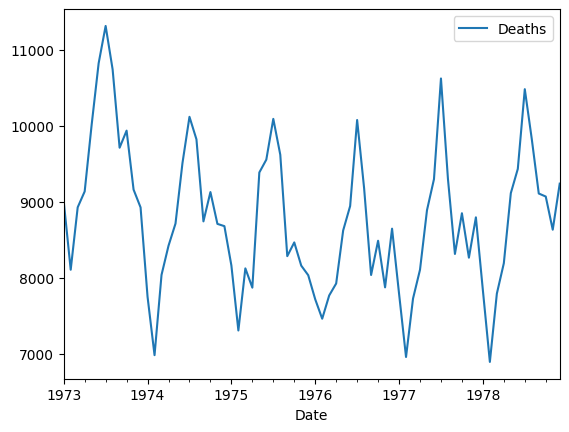

In [37]:
#create graph
unpivoted_deaths.plot()


#Loading Tables from HTML Pages using the read_html command
Retrieve Country Population From Wikipedia

In [38]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)'

# The "read_html" returns back a list of "dataframes", one for each table in the web page
df_list = pd.read_html(
            url, # Specify the page
            match='Population', # Write a pattern that is unique to the table we are interested in
            header=0 # which line of the table to use as a header
        )

len(df_list) # check how many tables match

2

In [39]:
df_list

[                  Country or territory  Population (1 July 2022)  \
 0                                World                8021407192   
 1                                India                1425423212   
 2                             China[a]                1425179569   
 3                        United States                 341534046   
 4                            Indonesia                 278830529   
 ..                                 ...                       ...   
 233        Montserrat (United Kingdom)                      4453   
 234  Falkland Islands (United Kingdom)                      3490   
 235              Tokelau (New Zealand)                      2290   
 236                 Niue (New Zealand)                      1821   
 237                    Vatican City[x]                       505   
 
      Population (1 July 2023) Change (%) UN continental region[1]  \
 0                  8091734930     +0.88%                        –   
 1                  1438069596

In [40]:
# We get the first table in the list, which contains the population of the countries
df_population = df_list[0]
df_population

,Country or territory,Population (1 July 2022),Population (1 July 2023),Change (%),UN continental region[1],UN statistical subregion[1]
0,World,8021407192,8091734930,+0.88%,–,–
1,India,1425423212,1438069596,+0.89%,Asia,Southern Asia
2,China[a],1425179569,1422584933,−0.18%,Asia,Eastern Asia
3,United States,341534046,343477335,+0.57%,Americas,Northern America
4,Indonesia,278830529,281190067,+0.85%,Asia,South-eastern Asia
...,...,...,...,...,...,...
233,Montserrat (United Kingdom),4453,4420,−0.74%,Americas,Caribbean
234,Falkland Islands (United Kingdom),3490,3477,−0.37%,Americas,South America
235,Tokelau (New Zealand),2290,2397,+4.67%,Oceania,Polynesia
236,Niue (New Zealand),1821,1817,−0.22%,Oceania,Polynesia


In [41]:
# Remove the footnote notations in square brackets (eg., "[4]")
# The code uses regular expressions for removing the unecessary text
df_population = df_population.replace(
    to_replace = r'(.*)\[.\]',
    value = r'\1',
    regex=True
)

df_population

,Country or territory,Population (1 July 2022),Population (1 July 2023),Change (%),UN continental region[1],UN statistical subregion[1]
0,World,8021407192,8091734930,+0.88%,–,–
1,India,1425423212,1438069596,+0.89%,Asia,Southern Asia
2,China,1425179569,1422584933,−0.18%,Asia,Eastern Asia
3,United States,341534046,343477335,+0.57%,Americas,Northern America
4,Indonesia,278830529,281190067,+0.85%,Asia,South-eastern Asia
...,...,...,...,...,...,...
233,Montserrat (United Kingdom),4453,4420,−0.74%,Americas,Caribbean
234,Falkland Islands (United Kingdom),3490,3477,−0.37%,Americas,South America
235,Tokelau (New Zealand),2290,2397,+4.67%,Oceania,Polynesia
236,Niue (New Zealand),1821,1817,−0.22%,Oceania,Polynesia


In [42]:
# Rename the columns
df_population.columns = ['Country', 'Region', 'Subegion', 'Population_2022', 'Population_2023', 'Change']
df_population

In [43]:
# Keep only the columns we need
df_population = df_population.filter( items = ['Country', 'Population_2023'] )
df_population

,Country,Population_2023
0,World,–
1,India,Asia
2,China,Asia
3,United States,Americas
4,Indonesia,Asia
...,...,...
233,Montserrat (United Kingdom),Americas
234,Falkland Islands (United Kingdom),Americas
235,Tokelau (New Zealand),Oceania
236,Niue (New Zealand),Oceania


#Retrieve Life Expectancy From Wikipedia


In [44]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_life_expectancy'
df_list = pd.read_html(
            url, # Specify the page
            match='Life expectancy at birth', # Write a pattern that is unique to the table we are interested in
            header=0 # which line of the table to use as a header
        )

len(df_list) # check how many tables match

1

In [49]:
df_who=df_list[0] # get the first of the tables
df_who

,Countries,Life expectancy at birth,Life expectancy at birth.1,Life expectancy at birth.2,Life expectancy at birth.3,Life expectancy at birth.4,HALE at birth,HALE at birth.1,HALE at birth.2,HALE at birth.3,...,Life expectancy at age 60,Life expectancy at age 60.1,Life expectancy at age 60.2,Life expectancy at age 60.3,Life expectancy at age 60.4,HALE at age 60,HALE at age 60.1,HALE at age 60.2,HALE at age 60.3,HALE at age 60.4
0,Countries,All,M,F,FΔM,Δ 2000,All,M,F,FΔM,...,All,M,F,FΔM,Δ 2000,All,M,F,FΔM,Δ 2000
1,Japan,84.3,81.5,86.9,5.4,3.2,74.1,72.6,75.5,2.9,...,26.3,23.9,28.6,4.7,2.2,20.4,18.8,21.8,3.0,1.7
2,Switzerland,83.4,81.8,85.1,3.3,3.7,72.5,72.2,72.8,0.6,...,25.4,24.1,26.6,2.5,2.4,19.5,18.8,20.2,1.4,1.8
3,South Korea,83.3,80.3,86.1,5.8,7.1,73.1,71.3,74.7,3.4,...,25.8,23.4,27.9,4.5,5.1,19.8,18.2,21.2,3.0,3.9
4,Singapore,83.2,81.0,85.5,4.5,4.8,73.6,72.4,74.7,2.3,...,25.5,23.8,27.2,3.4,4.0,20.0,18.8,21.0,2.2,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,Mozambique,58.1,54.5,61.7,7.2,7.4,50.4,47.9,52.8,4.9,...,15.8,13.3,17.8,4.5,0.6,11.6,9.8,13.0,3.2,0.6
181,Eswatini,57.7,53.4,63.2,9.8,10.7,50.1,47.1,53.8,6.7,...,15.1,12.4,17.7,5.3,1.5,11.0,9.0,12.9,3.9,1.1
182,Somalia,56.5,54.0,59.2,5.2,6.6,49.7,48.3,51.3,3.0,...,14.5,13.2,16.0,2.8,1.4,11.2,10.3,12.2,1.9,1.1
183,Central African Republic,53.1,50.2,56.3,6.1,8.8,46.4,44.5,48.4,3.9,...,13.2,11.3,14.9,3.6,1.4,10.0,8.6,11.1,2.5,1.1


In [50]:
# Keep only two columns
df_who = df_who.filter( items = ['Countries', 'Life expectancy at birth'] )
# Delete the first two lines of the dataset
df_who = df_who.drop([0])
df_who

,Countries,Life expectancy at birth
1,Japan,84.3
2,Switzerland,83.4
3,South Korea,83.3
4,Singapore,83.2
5,Spain,83.2
...,...,...
180,Mozambique,58.1
181,Eswatini,57.7
182,Somalia,56.5
183,Central African Republic,53.1


In [51]:
# Convert the 'Life expectancy at birth' column to numeric
# and store it in a column called "Life_Expectancy"
df_who['Life_expectancy'] = pd.to_numeric(df_who['Life expectancy at birth'])
# Delete the original column
df_who = df_who.drop('Life expectancy at birth', axis='columns')
df_who

,Countries,Life_expectancy
1,Japan,84.3
2,Switzerland,83.4
3,South Korea,83.3
4,Singapore,83.2
5,Spain,83.2
...,...,...
180,Mozambique,58.1
181,Eswatini,57.7
182,Somalia,56.5
183,Central African Republic,53.1


<Axes: xlabel='Countries', ylabel='Life_expectancy'>

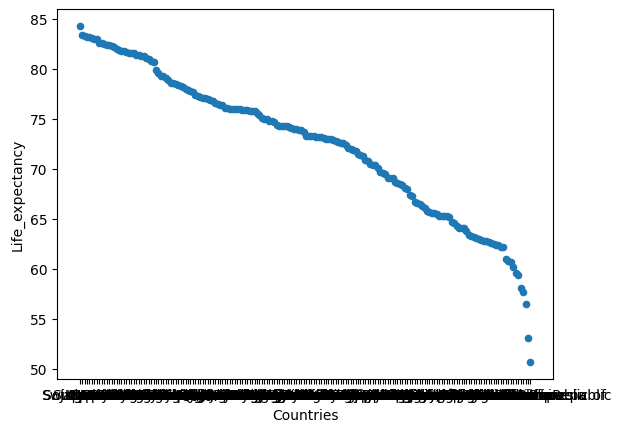

In [52]:
df_who.plot.scatter(x='Countries', y='Life_expectancy')